In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import DBSCAN
from sklearn import metrics
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import make_circles

## Dataset

In [4]:
filepath = '/content/drive/MyDrive/Lake_Bilancino.csv'
macro_data = pd.read_csv(filepath)

In [5]:
macro_data["Date"]=pd.to_datetime(macro_data["Date"])

<ipython-input-5-666ccfe60ed0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  macro_data["Date"]=pd.to_datetime(macro_data["Date"])


In [6]:
macro_data.set_index('Date',inplace=True)

In [7]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 2002-03-06 to 2020-06-30
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      6026 non-null   float64
 1   Rainfall_Mangona      6026 non-null   float64
 2   Rainfall_S_Agata      6026 non-null   float64
 3   Rainfall_Cavallina    6026 non-null   float64
 4   Rainfall_Le_Croci     6026 non-null   float64
 5   Temperature_Le_Croci  6025 non-null   float64
 6   Lake_Level            6603 non-null   float64
 7   Flow_Rate             6582 non-null   float64
dtypes: float64(8)
memory usage: 464.3 KB


## Preprocessing

In [8]:
columnsWithNa=list([macro_data.columns[macro_data.isnull().any()]][0])

In [9]:
len(columnsWithNa)

7

In [10]:
macro_data[columnsWithNa[0]].mean()

2.4712246929970125

In [11]:
for column in columnsWithNa :
  if macro_data[column].mean()==0:
    macro_data.drop(column, axis=1, inplace=True)
  else:
    macro_data[column].fillna(macro_data[column].mean(), inplace = True)

In [12]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 2002-03-06 to 2020-06-30
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      6603 non-null   float64
 1   Rainfall_Mangona      6603 non-null   float64
 2   Rainfall_S_Agata      6603 non-null   float64
 3   Rainfall_Cavallina    6603 non-null   float64
 4   Rainfall_Le_Croci     6603 non-null   float64
 5   Temperature_Le_Croci  6603 non-null   float64
 6   Lake_Level            6603 non-null   float64
 7   Flow_Rate             6603 non-null   float64
dtypes: float64(8)
memory usage: 464.3 KB


In [13]:
columns=macro_data.columns

In [14]:
columns

Index(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [15]:
macro_data.index

DatetimeIndex(['2002-03-06', '2002-04-06', '2002-05-06', '2002-06-06',
               '2002-07-06', '2002-08-06', '2002-09-06', '2002-10-06',
               '2002-11-06', '2002-12-06',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', length=6603, freq=None)

In [16]:
def plot_graph(data,columns):
  df=data.copy()
  with plt.style.context('bmh'):
    font = {'color': 'darkred', 'size': 12, 'family': 'serif'}
    font_legend = {'size': 12, 'family': 'serif'}

    fig, axs = plt.subplots(len(columns), 1,figsize=(10, 20))
    for i in range(len(columns)):
        axs[i].scatter(df.index,df[columns[i]], label=columns[i], color='#2f83e4')
        axs[i].set_xlabel('Time', fontdict=font)
        axs[i].set_ylabel('Data', fontdict=font)
        axs[i].legend(loc='upper left', prop=font_legend)

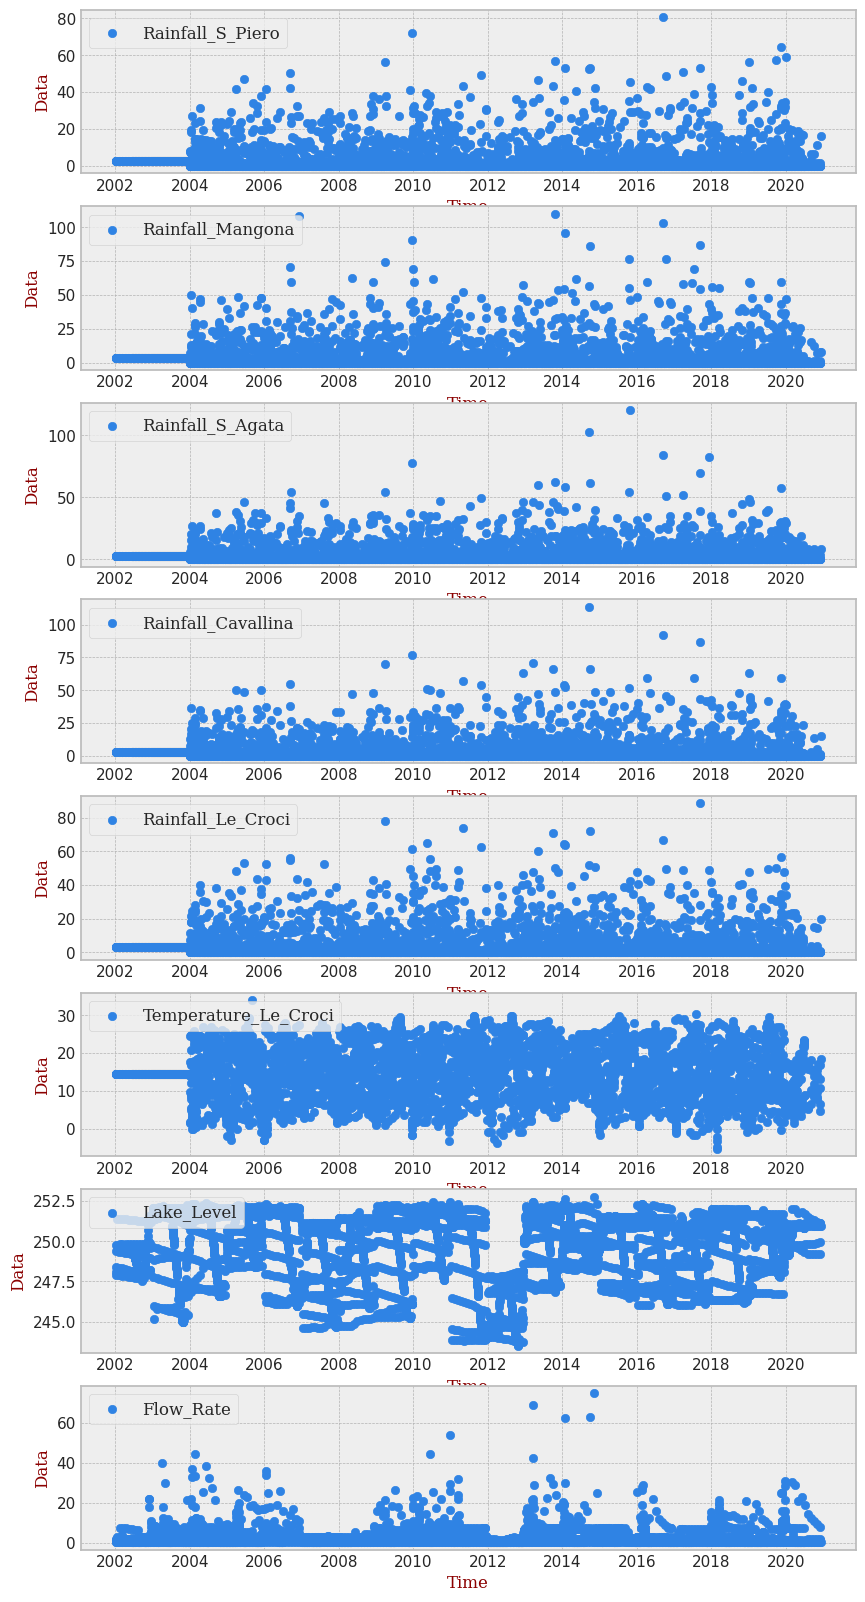

In [17]:
plot_graph(macro_data,columns)

In [18]:
macro_data=macro_data.drop(["Temperature_Le_Croci","Lake_Level"],axis=1)

In [19]:
columns=macro_data.columns

In [38]:
processor = preprocessing.MinMaxScaler()
data_n= processor.fit_transform(macro_data)

## DBSCAN

In [39]:
dbscan = DBSCAN(eps=0.1, min_samples=12)
dbscan.fit(data_n)

DBSCAN(eps=0.1, min_samples=12)

In [40]:
def get_points(dbscan, X):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    points={'cores':cores, 'anomalies':anomalies, 'non_cores':non_cores}
    return points

In [41]:
points=get_points(dbscan, data_n)
cores=points['cores']
anomalies=points['anomalies']
non_cores=points['non_cores']

In [42]:
data_n.shape[0]

6603

In [43]:
cores.shape[0]+anomalies.shape[0]+non_cores.shape[0]

6603

In [44]:
data_n.shape

(6603, 6)

In [45]:
macro_data.index[0]

Timestamp('2002-03-06 00:00:00')

In [46]:
anomalies_indices = np.where((data_n[:, None] == anomalies).all(-1))[0]
len(anomalies_indices)

244

In [49]:
type(anomalies_indices)

numpy.ndarray

In [36]:
len(macro_data.index)

6603

In [50]:
data_n.shape

(6603, 6)

In [51]:
def plot_anomalies(df,index,columns,anomalies):
  data=df.copy()
  if not isinstance(anomalies, np.ndarray):
    anomalies = np.array(anomalies)
  print(type(anomalies))
  anomalies_indices = np.where((data[:, None] == anomalies).all(-1))[0]
  with plt.style.context('bmh'):
      font = {'color': 'darkred', 'size': 12, 'family': 'serif'}
      font_legend = {'size': 12, 'family': 'serif'}

      fig, axs = plt.subplots(len(columns), 1,figsize=(10, 20))

      for i in range(len(columns)):
        axs[i].scatter(index,data[:,i], label=columns[i], color='#2f83e4')
        axs[i].scatter(index[anomalies_indices],anomalies[:,i],c="r", marker="*", label="Anomaly")
        axs[i].set_xlabel('Time', fontdict=font)
        axs[i].set_ylabel('Data', fontdict=font)
        axs[i].legend(loc='upper left', prop=font_legend)

<class 'numpy.ndarray'>


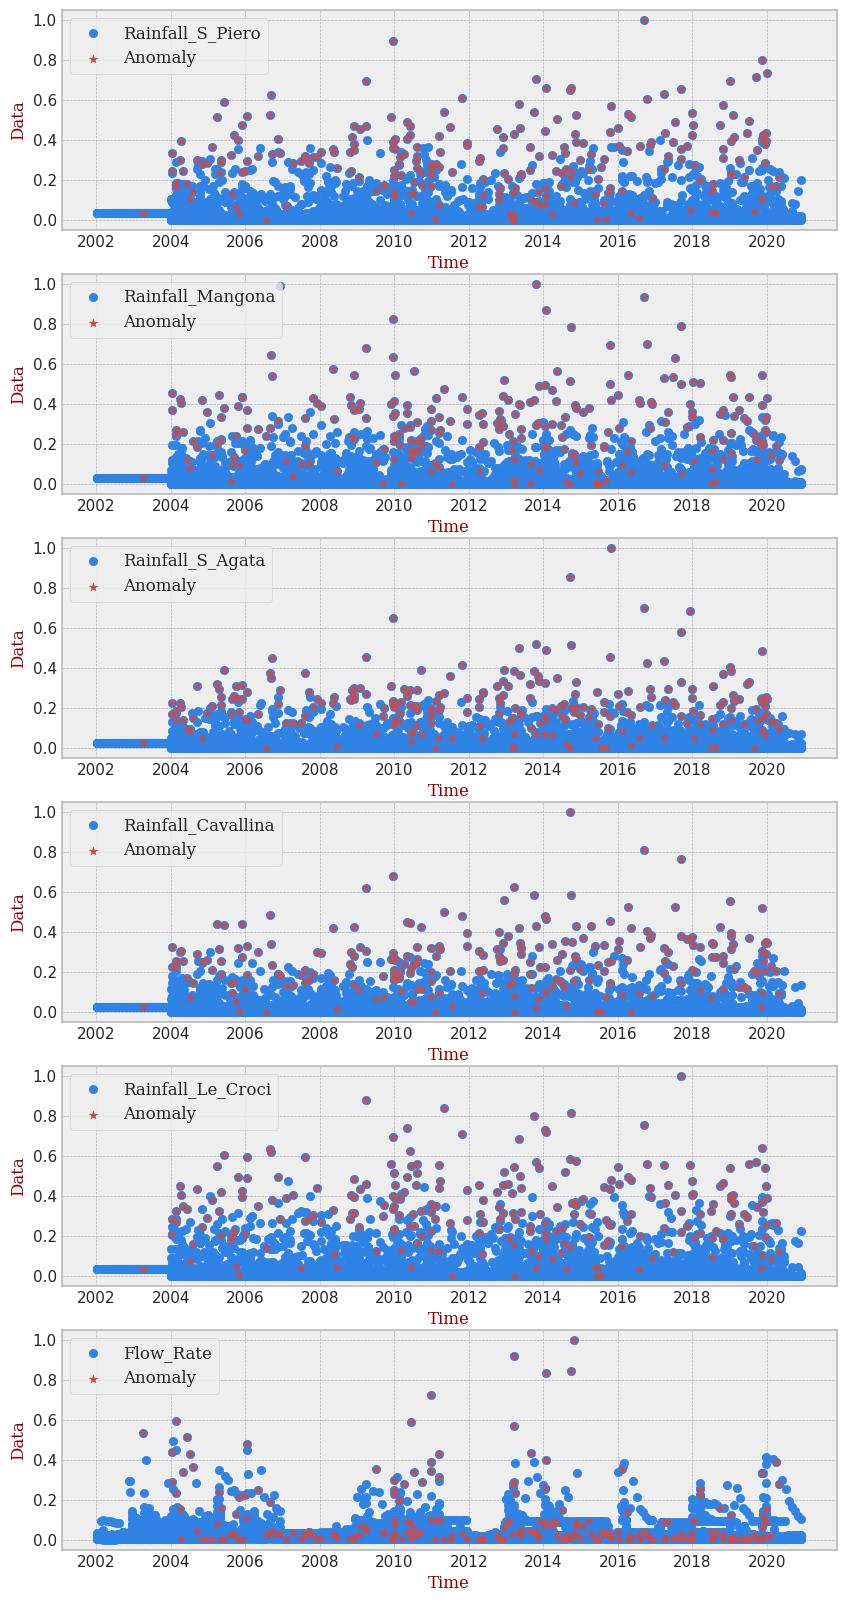

In [52]:
plot_anomalies(data_n,macro_data.index,columns,anomalies)

## DDBSCAN

In [53]:
pip install ddbscan

  Preparing metadata (setup.py) ... done
  Created wheel for ddbscan: filename=ddbscan-0.3.0-py3-none-any.whl size=5770 sha256=5b8d1e44c784f5bd55de70533b17408ec97ec51f00690869f2acb1056d73edf9
  Stored in directory: /root/.cache/pip/wheels/04/ae/6b/930614706041db5c8785d4c0acde648eabd6adab53f64f9d09
Successfully built ddbscan


In [54]:
data_n_l=data_n.tolist()
type(data_n_l)

list

In [55]:
import ddbscan
ddbscan = ddbscan.DDBSCAN(0.1, 12)
for point in data_n_l:
  ddbscan.add_point(point=point, count=1, desc="")

In [56]:
ddbscan.compute()

In [57]:
anomaly_points=[]

In [58]:
for i in range(len(ddbscan.points)):
    if ddbscan.points_data[i].cluster == -1:
        print('\t <== Anomaly found!')
        anomaly_points.append(ddbscan.points[i])

	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly found!
	 <== Anomaly

In [59]:
anomaly_points=np.array(anomaly_points)

In [60]:
anomaly_points.shape

(244, 6)

<class 'numpy.ndarray'>


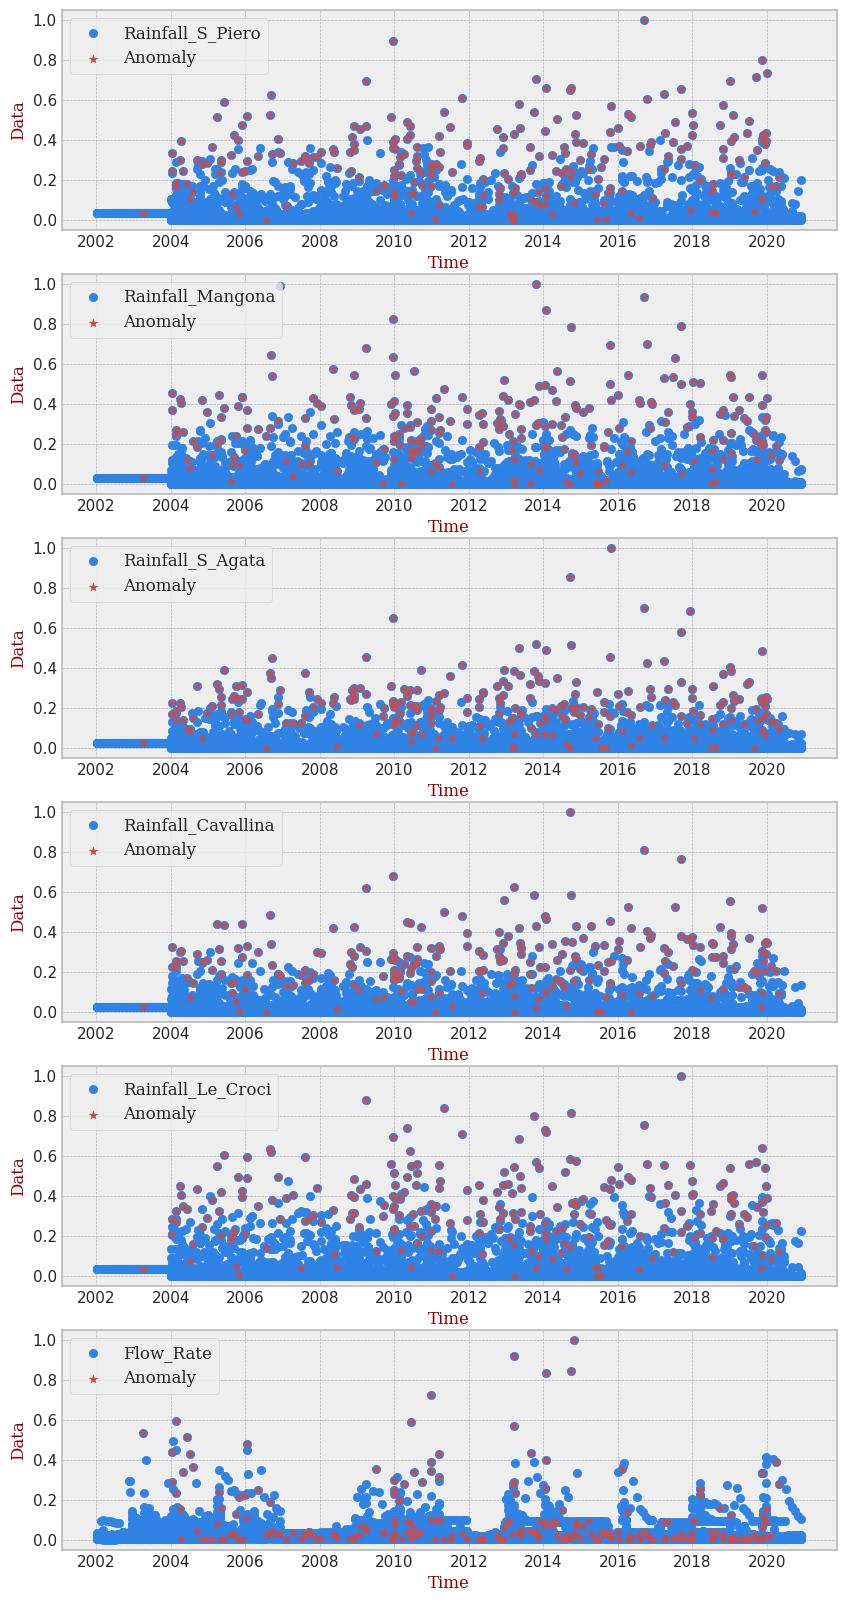

In [61]:
plot_anomalies(data_n,macro_data.index,columns,anomaly_points)